In [155]:
# !pip install open3d
# !pip install ipywidgets


demo_path = "/home/tlips/bc_data/mic-switches/gello"



import os 
 
demos = os.listdir(demo_path)
print(demos)
demo = "1203_162704"

['1203_162704']


In [156]:
pickles = os.listdir(os.path.join(demo_path, demo))
# order by time
pickles.sort()

print(pickles)

pickle_path = pickles[-1]

['2024-12-03T16:27:04.328732.pkl', '2024-12-03T16:27:04.459371.pkl', '2024-12-03T16:27:04.594587.pkl', '2024-12-03T16:27:04.728841.pkl', '2024-12-03T16:27:04.859111.pkl', '2024-12-03T16:27:04.992656.pkl', '2024-12-03T16:27:05.130855.pkl', '2024-12-03T16:27:05.264435.pkl', '2024-12-03T16:27:05.393452.pkl', '2024-12-03T16:27:05.527017.pkl', '2024-12-03T16:27:05.660538.pkl', '2024-12-03T16:27:05.794207.pkl', '2024-12-03T16:27:05.926743.pkl', '2024-12-03T16:27:06.060558.pkl', '2024-12-03T16:27:06.193517.pkl', '2024-12-03T16:27:06.327088.pkl', '2024-12-03T16:27:06.460762.pkl', '2024-12-03T16:27:06.594248.pkl', '2024-12-03T16:27:06.728491.pkl', '2024-12-03T16:27:06.864171.pkl', '2024-12-03T16:27:06.994178.pkl', '2024-12-03T16:27:07.128812.pkl', '2024-12-03T16:27:07.260857.pkl', '2024-12-03T16:27:07.396583.pkl', '2024-12-03T16:27:07.531319.pkl', '2024-12-03T16:27:07.661153.pkl', '2024-12-03T16:27:07.794405.pkl', '2024-12-03T16:27:07.927852.pkl', '2024-12-03T16:27:08.063344.pkl', '2024-12-03T1

In [157]:
import pickle

obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))

In [158]:
print(obs.keys())
'''for k,v in obs.items():
    print(k)
    print(v)'''

dict_keys(['left-wrist_rgb', 'left-wrist_depth', 'base_rgb', 'base_depth', 'joint_positions', 'tcp_pose_rotvec', 'wrench', 'switches', 'mic_spectrogram', 'mic_frame', 'gripper_position', 'base_rgb_cropped', 'control'])


'for k,v in obs.items():\n    print(k)\n    print(v)'

In [159]:
positions = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    pose = obs["tcp_pose_rotvec"]
    position = pose[:3]
    positions.append(position)

In [160]:
import open3d 

# jet color scheme 
import cv2
import numpy as np

# visualize the positions
pcd = open3d.geometry.PointCloud()
# encode the colors using the spectral color scheme according to time

pcd.points = open3d.utility.Vector3dVector(positions)
colors = []
for i in range(len(positions)):
    color = cv2.applyColorMap(np.array(i/len(positions)*255,dtype=np.uint8), cv2.COLORMAP_CIVIDIS)
    colors.append(color[0][0]/255)



pcd.colors = open3d.utility.Vector3dVector(colors)

# add a coordinate frame of the robot
frame = open3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0,0,0])

open3d.visualization.draw_geometries([pcd, frame])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# get the camera images and display them 
wrist_images = []
base_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    wrist_img = obs["left-wrist_rgb"]
    base_img = obs["base_rgb"]
    wrist_img = wrist_img.astype(np.uint8)
    base_img = base_img.astype(np.uint8)
    wrist_images.append(wrist_img)
    base_images.append(base_img)
# create ipywidget slider to display the  numpy array images
slider = widgets.IntSlider(min=0, max=len(wrist_images)-1)

def view_image(i):
    wrist_img = wrist_images[i]
    base_image = base_images[i]
    
    # display the image
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(wrist_img)
    ax[1].imshow(base_image)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)


#view_image(0)
#plt.show()


interactive(children=(IntSlider(value=0, description='i', max=82), Output()), _dom_classes=('widget-interact',…

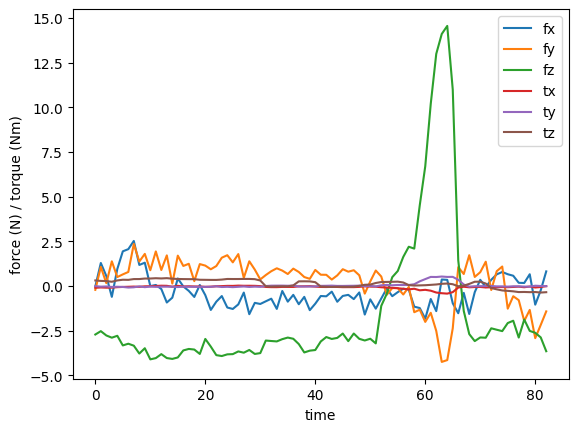

In [162]:
# visualize the FT wrench timeseries

ft_wrench = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    ft = obs["wrench"]
    ft_wrench.append(ft)


ft_wrench = np.array(ft_wrench)

# plot the timeseries
plt.plot(ft_wrench)
plt.xlabel("time")
plt.ylabel("force (N) / torque (Nm)")
plt.legend(["fx", "fy", "fz", "tx", "ty", "tz"])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


spectrogram_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    spectrogram = obs["mic_spectrogram"]
    img = spectrogram.astype(np.uint8)
    spectrogram_images.append(img)
# create ipywidget slider to display the  numpy array images
slider = widgets.IntSlider(min=0, max=len(spectrogram_images)-1)

def view_image(i):
    img = spectrogram_images[i]
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)

interactive(children=(IntSlider(value=0, description='i', max=82), Output()), _dom_classes=('widget-interact',…

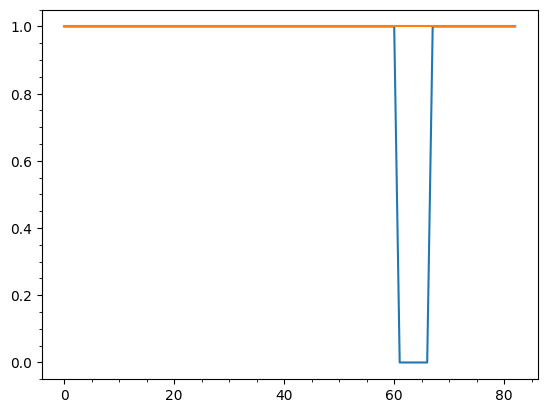

In [164]:
# read switches
switches_values = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    switches = obs["switches"]
    switches_values.append(switches)

plt.minorticks_on()
plt.plot(switches_values)
#plt.xlim((125, 150))